# Proyecto final
# Técnicas de inteligencia artificial
# Contreras Aguilar Fernando - 201735460


Importaciones


In [1]:
# Imports
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random

Grafo inicial

[('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'A'), ('A', 'G'), ('D', 'G'), ('G', 'H'), ('H', 'I'), ('H', 'J'), ('B', 'I'), ('C', 'J'), ('E', 'I'), ('F', 'J'), ('B', 'H'), ('K', 'A'), ('C', 'K'), ('H', 'K'), ('D', 'K'), ('B', 'F')]


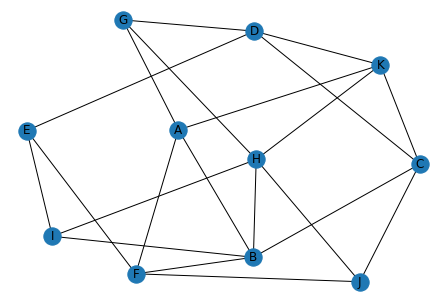

In [2]:
G = nx.Graph()

# relationships
relationships = pd.DataFrame({'from': ['A','B','C','D','E','F','A','D','G','H','H','B','C','E','F','B','K','C','H','D','B'],
                              'to':   ['B','C','D','E','F','A','G','G','H','I','J','I','J','I','J','H','A','K','K','K','F']})
tuples = list(relationships.to_records(index=False))
print(tuples)

# Graph object
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

#plot
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

Métodos

In [38]:
class Chromosome(object):
  '''
  Class representing a Chromosome in population
  '''
  def __init__(self, genes):
    self.genes = genes
    self.fitness = self.fit()

  '''
  Calculates fitness of a chromosome
  '''
  def fit(self):
    # Convert a gene in a dictionary, e.g. 'A':"red"
    # i.e. value "red" is accesed by the key 'A'
    dic = dict(self.genes)
    # tuples contains the connections accross the graph
    count = len(tuples)
    for tup in tuples:
      # take a connection, search it´s colors with the key
      # if the color matches, the fitness decreases
      if dic[tup[0]] == dic[tup[1]]:
        count+=-1
    fitness = count*100/len(tuples)
    return fitness

'''
Crossover two chromosomes
'''
def crossover(parent1, parent2):
    s = random.randint(0, len(parent1.genes)-1)
    # Take from 0 to s genes from parent 1
    p1_genes = parent1.genes[:s]
    # Take from s to len from parent 2
    p2_genes = parent2.genes[s:]
    # Add genes from 2 to 1
    p1_genes.extend(p2_genes)
    # Child 1 = Genes1 + Genes2
    child1 = p1_genes
    p1_genes = parent1.genes[s:]
    p2_genes = parent2.genes[:s]
    p2_genes.extend(p1_genes)
    child2 = p2_genes

    return child1, child2

'''
Mutate a chromosome
'''
def mutate(chromosome, colors):
  p = random.random()

  # Since mutation occurs rarely
  if p > 0.90:
    mp = random.random()
    # mutate one gen
    if mp <= 0.40:
      pos = random.randint(0,len(chromosome.genes)-1)
      # Take a random gene and assigns it a random a color
      node = chromosome.genes[pos][0]
      chromosome.genes[pos] = (node,random.choice(colors))
    # mutate third of the genes
    if (mp > 0.40 and mp < 0.60):
      pos = random.sample(range(0,len(chromosome.genes)),int(len(chromosome.genes)/3))
      for i in pos:
        node = chromosome.genes[i][0]
        chromosome.genes[i] = (node,random.choice(colors))
    # mutate half of the genes
    if mp > 0.60 and mp < 0.75:
      pos = random.sample(range(0,len(chromosome.genes)),int(len(chromosome.genes)/2))
      for i in pos:
        node = chromosome.genes[i][0]
        chromosome.genes[i] = (node,random.choice(colors))
    # mutate 3/4 of the genes
    if mp > 0.75 and mp < 0.90:
      pos = random.sample(range(0,len(chromosome.genes)),int(len(chromosome.genes)*75/100))
      for i in pos:
        node = chromosome.genes[i][0]
        chromosome.genes[i] = (node,random.choice(colors))
    # mutate all of the genes
    if mp >= 0.90:
      for i in range(len(chromosome.genes)):
        node = chromosome.genes[i][0]
        chromosome.genes[i] = (node,random.choice(colors))




Población inicial


In [45]:
colors = ['red', 'blue', 'green']
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K']
RV, SV, CV = [], [], []

# Generate a random population size between 20 and 80
pop_size = random.randint(100, 200)

RV = colors
print(RV)

SV = nodes
print(SV)

# Connections r,s between nodes and colors
for _ in range(pop_size):
  chromosome = []
  for x in range(len(SV)):
    chromosome.append((SV[x], random.choice(RV)))
  CV.append(Chromosome(chromosome))

generation = 1
finish = False

['red', 'blue', 'green']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']


In [46]:
while not finish:

  # Sort CV in increasing order of fitness score
  # Puts the fittest chromosome first
  CV = sorted(CV, key = lambda c: c.fitness, reverse=True)

  # If the fittest chromosome has a fitness value of 100, then break
  if CV[0].fitness == 100:
    finish = True
    break

  new_generation = []
  # Elitism on the 10% of the fittest chromosomes
  new_generation.extend(CV[:int((10*len(CV)/100))])

  # Get all chromosomes whose fitness value > 60%
  fittest = []
  for chromosome in CV:
    if chromosome.fitness <= 60:
      break
    fittest.append(chromosome)

  # Crossover two chromosomes and append to the new generation
  for _ in range(50):
    parent1, parent2 = random.choice(fittest), random.choice(fittest)
    child1, child2 = crossover(parent1, parent2)
    new_generation.append(Chromosome(child1))
    new_generation.append(Chromosome(child2))

  CV = new_generation
  mutate(CV[0], colors)

  # Print the best chromosome of the generation
  print("Generation: ", generation, " Genes", CV[0].genes, " Fitness:", CV[0].fitness)

  generation += 1

# End of the algorithm, CV[0] is the fittest chromosome because it´s sorted by fitness
print("Generation: ", generation, " Genes", CV[0].genes, " Fitness:", CV[0].fitness)


Generation:  1  Genes [('A', 'red'), ('B', 'blue'), ('C', 'red'), ('D', 'green'), ('E', 'red'), ('F', 'green'), ('G', 'red'), ('H', 'green'), ('I', 'blue'), ('J', 'blue'), ('K', 'blue')]  Fitness: 90.47619047619048
Generation:  2  Genes [('A', 'red'), ('B', 'blue'), ('C', 'red'), ('D', 'green'), ('E', 'red'), ('F', 'green'), ('G', 'red'), ('H', 'green'), ('I', 'blue'), ('J', 'blue'), ('K', 'blue')]  Fitness: 90.47619047619048
Generation:  3  Genes [('A', 'red'), ('B', 'blue'), ('C', 'red'), ('D', 'green'), ('E', 'red'), ('F', 'green'), ('G', 'red'), ('H', 'green'), ('I', 'blue'), ('J', 'blue'), ('K', 'blue')]  Fitness: 90.47619047619048
Generation:  4  Genes [('A', 'red'), ('B', 'blue'), ('C', 'red'), ('D', 'green'), ('E', 'red'), ('F', 'green'), ('G', 'red'), ('H', 'green'), ('I', 'blue'), ('J', 'blue'), ('K', 'blue')]  Fitness: 90.47619047619048
Generation:  5  Genes [('A', 'red'), ('B', 'blue'), ('C', 'red'), ('D', 'green'), ('E', 'red'), ('F', 'green'), ('G', 'red'), ('H', 'green')

['red', 'green', 'blue', 'red', 'green', 'blue', 'blue', 'red', 'blue', 'green', 'green']


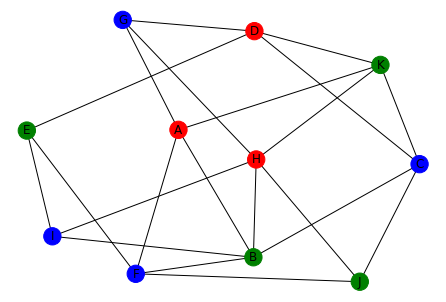

In [37]:
G = nx.Graph()

colors_map = []
for node in CV[0].genes:
  colors_map.append(node[1])

print(colors_map)

# Graph object
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())

#plot
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colors_map)
plt.show()